![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California . The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

This notebook is for analyzing crime data to identify patterns in criminal behavior.
## The Data: crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

## Data Investigation

In [105]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [106]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(2), object(10)
memory usage: 17.0+ MB


## 1. **Finding the frequencies of crime by the hour of occurance** :

- The answer will be in column **TIME OCC**

1.1 Convert to int format for more convieniance

In [107]:
crimes['TIME OCC'] = crimes['TIME OCC'].astype(int) # convert the column to int instead of object data type

In [108]:
crimes.info() # check the converted data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


1.2 Show column statstics:
- From column statstics it was observed that not all data has the 4 digit format, which will need handling

In [109]:
crimes["TIME OCC"].describe() #show the statistics of the whole time column (hours and mins)

count    185715.000000
mean       1300.024414
std         655.753163
min           1.000000
25%         830.000000
50%        1340.000000
75%        1830.000000
max        2359.000000
Name: TIME OCC, dtype: float64

1.3 Extracting the hour info from the 'TIME OCC' column and handling the different digit number formats

- The first trial shows problems where the number of unique values was 59 and not 24 as expected
- Upon investigating it was found that this is due to the mid night hr representation 00:min -> min which was interpreted as hr
- handling the issue and validating with plots and value_count()

In [110]:
# extract the hour from the time of occurance
crimes['HOUR OCC'] = np.where(
    crimes['TIME OCC'] < 100, crimes['TIME OCC'], # if 1-2 digits then just hour
    np.where(crimes['TIME OCC'] < 1000, crimes['TIME OCC'] // 100, crimes['TIME OCC'] // 100) 
)

In [111]:
crimes[['HOUR OCC','TIME OCC']] # validate the operation

,HOUR OCC,TIME OCC
0,11,1110
1,16,1620
2,12,1200
3,6,635
4,9,900
...,...,...
185710,11,1100
185711,18,1800
185712,10,1000
185713,16,1630


In [112]:
crimes['HOUR OCC'].value_counts().sort_index() #upon checking the unique values problem was detected of hr > 23

1      9423
2      4809
3      4016
4      3293
5      3823
6      5674
7      5451
8      7555
9      7138
10     8878
11     8815
12    13700
13     8505
14     8895
15     9787
16     9240
17     9980
18    10144
19     9283
20     9883
21     8727
22     8550
23     7440
24       16
25      136
26       22
27       12
28       17
29       10
30     1169
31       13
32       18
33       16
34        9
35      130
36       13
37       18
38       18
39       12
40      246
41       14
42       13
43       12
44        8
45      301
46       16
47       17
48       14
49       14
50      227
51        7
52       13
53       18
54        7
55      100
56        9
57       10
58       20
59       11
Name: HOUR OCC, dtype: int64

In [113]:
# upon investigating it was found that 2 digit 'TIME OCC'representing hr:00 and min:XY
print(f"Found {len(problem_rows)} rows with hour > 23")
problem_rows

Found 0 rows with hour > 23


Series([], Name: Vict Age, dtype: int64)

In [114]:
# extract the hour from the time of occurance

crimes['HOUR OCC'] = np.where(
    crimes['TIME OCC'] < 100,  # 1-2 digits
    np.where(
        crimes['TIME OCC'] < 24,  # If it's a valid hour (0-23)
        crimes['TIME OCC'],       # Use it as hour
        0                          # Otherwise it's minutes, hour is 0
    ),
    crimes['TIME OCC'] // 100  # For 3-4 digits, integer division
)

In [115]:
crime_hr_freq = crimes['HOUR OCC'].value_counts(sort=True) #validating correct conversion
crime_hr_freq

12    13700
18    10144
17     9980
20     9883
15     9787
1      9423
19     9283
16     9240
14     8895
10     8878
11     8815
21     8727
22     8550
13     8505
8      7555
23     7440
9      7138
6      5674
7      5451
2      4809
3      4016
5      3823
4      3293
0      2706
Name: HOUR OCC, dtype: int64

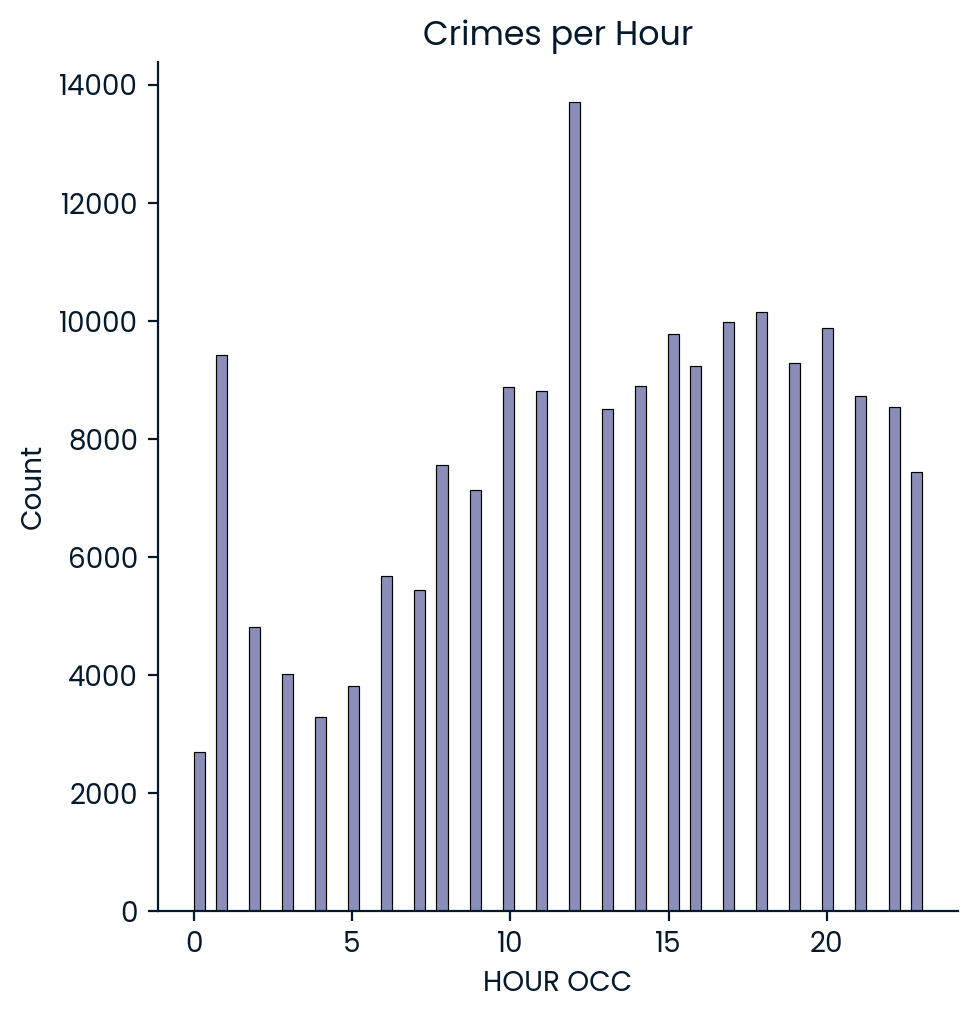

In [116]:
# plotting the freq using histogram 
sns.displot(data = crimes ,x = "HOUR OCC")
plt.title("Crimes per Hour")
plt.show()

1.4 Extracting the hour that has the highest frequency of crimes

In [117]:
peak_crime_hour = crime_hr_freq.idxmax()
peak_crime_hour

12

## 2. **Identifying the area with the most night crime** (crimes committed between 10pm and 3:59am):

- The answer will be in the constructed column column **HOUR OCC** and column **AREA NAME**

2.1 Filtering the rows based on the hour where the crime was commited in to only include [10,..3 am] that corresponds to [22, 23, 0, 1, 2, 3]

In [118]:
night_hours = [22, 23, 0, 1, 2, 3] # defining the hours that we will filter the rows up on 

night_crimes = crimes[crimes["HOUR OCC"].isin(night_hours)]
print(f"The number of night_crimes is {len(night_crimes)}")

The number of night_crimes is 36944


2.2 Count crimes per area

In [119]:
night_crime_counts = night_crimes.groupby("AREA NAME").size()
night_crime_counts

AREA NAME
77th Street    2412
Central        3161
Devonshire     1292
Foothill       1191
Harbor         1313
Hollenbeck     1180
Hollywood      2569
Mission        1375
N Hollywood    1746
Newton         2011
Northeast      1608
Olympic        2029
Pacific        1822
Rampart        1745
Southeast      2038
Southwest      2213
Topanga        1383
Van Nuys       1544
West LA        1237
West Valley    1437
Wilshire       1638
dtype: int64

2.3 Plotting the counts of crimes per each area

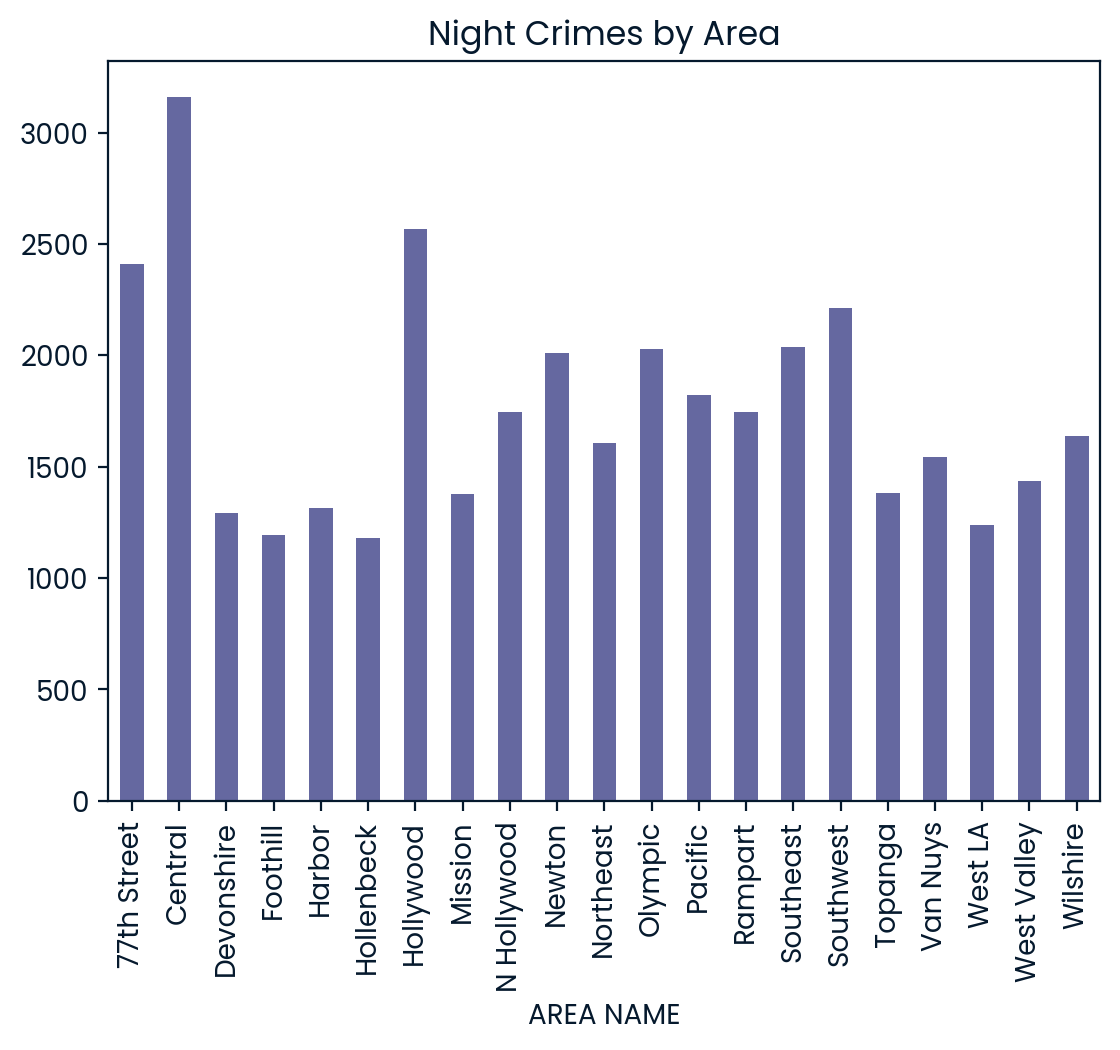

In [120]:
night_crime_counts.plot(kind="bar")
plt.title("Night Crimes by Area")
plt.show()


2.4 Finding the area with the maximum night crimes

In [121]:
peak_night_crime_location = night_crime_counts.idxmax()
peak_night_crime_location

'Central'

## 3. **Identify the number of crimes committed against victims of different age groups**

- The answer will be in the constructed column column **Vict Age**

3.1 Invesigating any problems in the **Vict Age** column 

In [122]:
crimes['Vict Age'].dtype # check data type

dtype('int64')

In [123]:
# check if any negative age 
problem_rows = crimes[crimes['Vict Age'] <0]['Vict Age']
print(f"Number of rows with problems {len(problem_rows)}")
problem_rows

Number of rows with problems 0


Series([], Name: Vict Age, dtype: int64)

3.2 Age binning to groups

In [124]:
# define age bins 
age_bins = [0, 17, 25, 34, 44, 54, 64, float("inf")]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create age group column in crimes DataFrame
crimes["age_group"] = pd.cut(
    crimes["Vict Age"],
    bins=age_bins,
    labels=age_labels,
    right=True
)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC,age_group
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,65+


3.3 Count crimes per age group

In [125]:
victim_ages = crimes["age_group"].value_counts().sort_index()
victim_ages

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: age_group, dtype: int64

3.4 ploting the frequency of each crime age group 

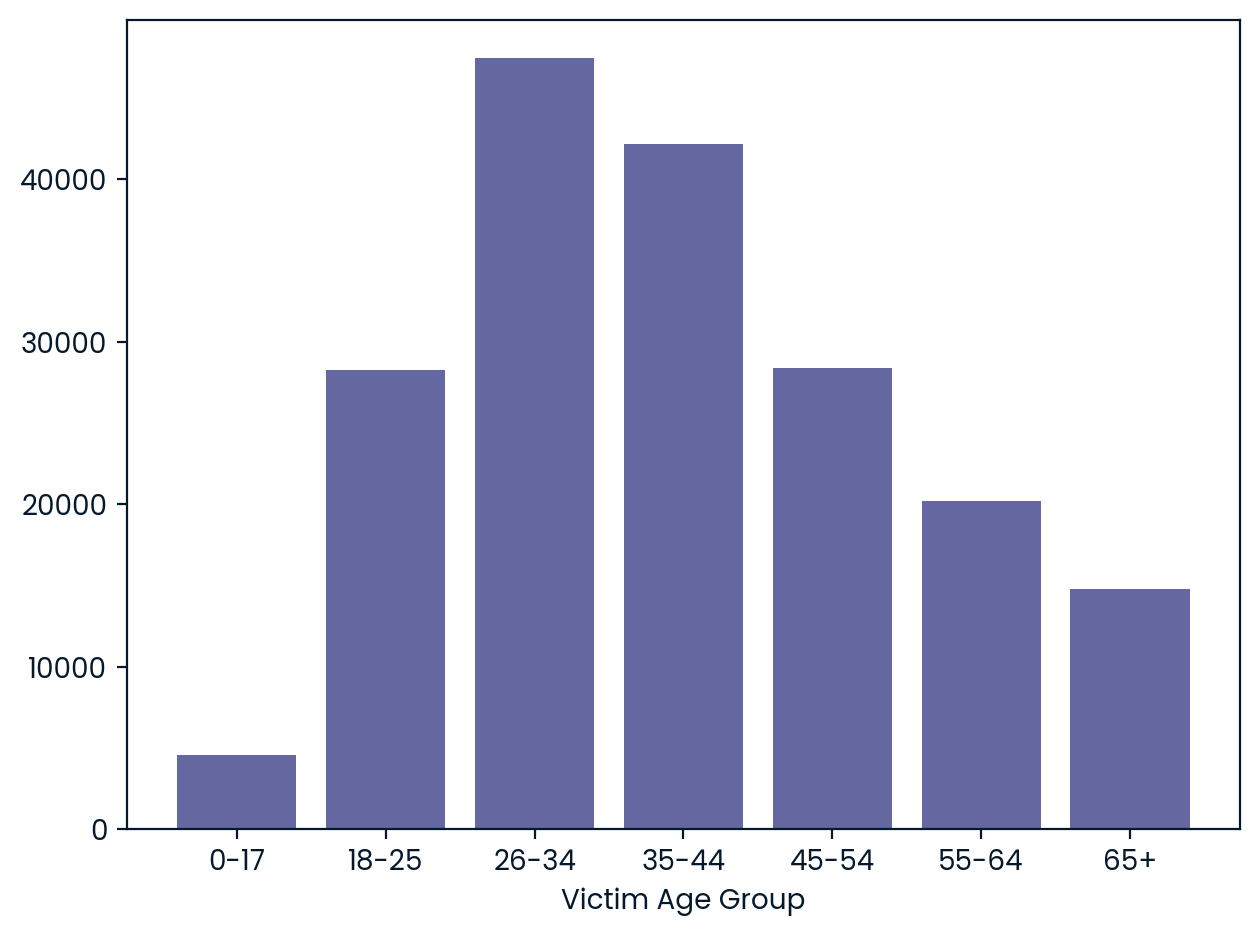

In [126]:
plt.bar(victim_ages.index, victim_ages.values)
plt.xlabel("Victim Age Group")
plt.tight_layout()
plt.show()
